In [1]:
import pandas as pd
import tqdm
import json
import process_pictures
import process_files
import process_rejects

In [2]:
loaded_markups = process_files.get_data("folders.lst")

In [3]:
loaded_markups

,Image path,Document Type,Template Quad
0,D:\study\diploma\data\photo\images\alb_id\00.jpg,alb_id,"[[613, 1767], [2007, 1674], [1769, 2260], [581..."
1,D:\study\diploma\data\photo\images\alb_id\01.jpg,alb_id,"[[393, 1305], [1710, 1447], [1644, 2350], [478..."
2,D:\study\diploma\data\photo\images\alb_id\02.jpg,alb_id,"[[251, 1518], [1647, 1334], [2187, 1922], [583..."
3,D:\study\diploma\data\photo\images\alb_id\03.jpg,alb_id,"[[472, 1237], [1943, 1544], [1694, 2372], [-73..."
4,D:\study\diploma\data\photo\images\alb_id\04.jpg,alb_id,"[[312, 1369], [1824, 1188], [1755, 2079], [416..."
...,...,...,...
995,D:\study\diploma\data\photo\images\svk_id\95.jpg,svk_id,"[[293, 1614], [1916, 1519], [1937, 2531], [372..."
996,D:\study\diploma\data\photo\images\svk_id\96.jpg,svk_id,"[[135, 2427], [1897, 2297], [1880, 3270], [251..."
997,D:\study\diploma\data\photo\images\svk_id\97.jpg,svk_id,"[[191, 1632], [2047, 1492], [1998, 2496], [358..."
998,D:\study\diploma\data\photo\images\svk_id\98.jpg,svk_id,"[[431, 1399], [2006, 1430], [1930, 2537], [315..."


In [4]:
with open("exe_bundle.path") as f:
    lines = f.readlines()
    exe_path = lines[0].strip()
    bundle_path = lines[1].strip()

In [ ]:
processed_df, total_unprocessed = process_pictures.process_sample(loaded_markups, exe_path, bundle_path)

In [3]:
processed_df.to_csv("processed_data.csv")

NameError: name 'processed_df' is not defined

In [4]:
processed_df = pd.read_csv("processed_data.csv")

In [5]:
unprocessed_images = processed_df[processed_df["Is processed"] == False]
#unprocessed_images = unprocessed_images[["Image path", "Document Type"]]
unprocessed_images.reset_index(drop=True, inplace=True)
unprocessed_images

,Unnamed: 0,Image path,Document Type,Processed Document Type,Is rejected,Confidence,Is processed
0,14,D:\study\diploma\data\photo\images\alb_id\14.jpg,alb_id,NaN,True,0.0,False
1,21,D:\study\diploma\data\photo\images\alb_id\21.jpg,alb_id,NaN,True,0.0,False
2,23,D:\study\diploma\data\photo\images\alb_id\23.jpg,alb_id,NaN,True,0.0,False
3,26,D:\study\diploma\data\photo\images\alb_id\26.jpg,alb_id,NaN,True,0.0,False
4,30,D:\study\diploma\data\photo\images\alb_id\30.jpg,alb_id,NaN,True,0.0,False
...,...,...,...,...,...,...,...
87,881,D:\study\diploma\data\photo\images\srb_passpor...,srb_passport,NaN,True,0.0,False
88,915,D:\study\diploma\data\photo\images\svk_id\15.jpg,svk_id,NaN,True,0.0,False
89,919,D:\study\diploma\data\photo\images\svk_id\19.jpg,svk_id,NaN,True,0.0,False
90,954,D:\study\diploma\data\photo\images\svk_id\54.jpg,svk_id,NaN,True,0.0,False


In [ ]:
dummy_result, dummy_unprocessed = process_pictures.process_sample(unprocessed_images, exe_path, bundle_path)

In [6]:
process_rejects.process_rejected_file(unprocessed_images, "a.txt")
unprocessed_images

d:\study\diploma\code\process_rejects.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed Document Type"][index] = max_tpl.split(":")[0]
C:\Users\admin\AppData\Local\Temp/ipykernel_19356/2336874004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  process_rejects.process_rejected_file(unprocessed_images, "a.txt")
d:\study\diploma\code\process_rejects.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Confidence"]

,Unnamed: 0,Image path,Document Type,Processed Document Type,Is rejected,Confidence,Is processed
0,14,D:\study\diploma\data\photo\images\alb_id\14.jpg,alb_id,,True,0.000000,False
1,21,D:\study\diploma\data\photo\images\alb_id\21.jpg,alb_id,,True,0.000000,False
2,23,D:\study\diploma\data\photo\images\alb_id\23.jpg,alb_id,,True,0.000000,False
3,26,D:\study\diploma\data\photo\images\alb_id\26.jpg,alb_id,,True,0.000000,False
4,30,D:\study\diploma\data\photo\images\alb_id\30.jpg,alb_id,,True,0.000000,False
...,...,...,...,...,...,...,...
87,881,D:\study\diploma\data\photo\images\srb_passpor...,srb_passport,srb.passport.type1,True,0.714286,False
88,915,D:\study\diploma\data\photo\images\svk_id\15.jpg,svk_id,,True,0.000000,False
89,919,D:\study\diploma\data\photo\images\svk_id\19.jpg,svk_id,,True,0.000000,False
90,954,D:\study\diploma\data\photo\images\svk_id\54.jpg,svk_id,,True,0.000000,False


In [7]:
processed_df = process_rejects.fix_df(unprocessed_images, processed_df)
processed_df

d:\study\diploma\code\process_rejects.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Processed Document Type"][line] = unproc_df["Processed Document Type"][counter]
d:\study\diploma\code\process_rejects.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Confidence"][line] = unproc_df["Confidence"][counter]


,Unnamed: 0,Image path,Document Type,Processed Document Type,Is rejected,Confidence,Is processed
0,0,D:\study\diploma\data\photo\images\alb_id\00.jpg,alb_id,alb.id.type1,False,0.705600,True
1,1,D:\study\diploma\data\photo\images\alb_id\01.jpg,alb_id,alb.id.type1,False,0.882461,True
2,2,D:\study\diploma\data\photo\images\alb_id\02.jpg,alb_id,alb.id.type1,False,0.837030,True
3,3,D:\study\diploma\data\photo\images\alb_id\03.jpg,alb_id,alb.id.type1,False,0.875130,True
4,4,D:\study\diploma\data\photo\images\alb_id\04.jpg,alb_id,alb.id.type1,False,0.877047,True
...,...,...,...,...,...,...,...
995,995,D:\study\diploma\data\photo\images\svk_id\95.jpg,svk_id,svk.id.type1,False,0.896178,True
996,996,D:\study\diploma\data\photo\images\svk_id\96.jpg,svk_id,svk.id.type1,False,0.888980,True
997,997,D:\study\diploma\data\photo\images\svk_id\97.jpg,svk_id,svk.id.type1,False,0.869003,True
998,998,D:\study\diploma\data\photo\images\svk_id\98.jpg,svk_id,svk.id.type1,False,0.877047,True


In [8]:
pts = process_rejects.get_roc_curve(processed_df,  0.01)

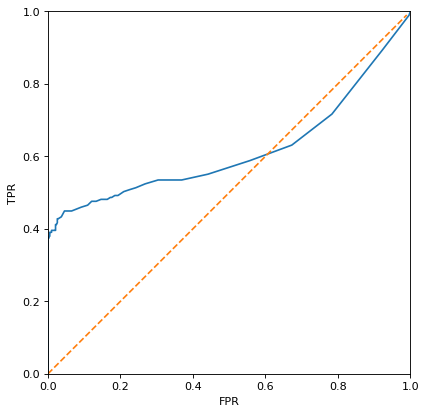

In [15]:
import matplotlib.pyplot as plt
import numpy as np
pts = np.array(pts)
mid = np.array([[i/100, i/100] for i in range(100)])
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
x = pts[:,0]
y = pts[:,1]
fig.gca().set_aspect("equal")
ax.set_xlim([0,1])
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_ylim([0,1])
ax.plot(x, y)
ax.plot(mid[:,0], mid[:,1], linestyle='dashed')

In [11]:
pts

array([[0.        , 0.        ],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.        , 0.37433155],
       [0.00123001, 0.37433155],
       [0.00123001, 0.37433155],
       [0.00123001, 0.37433155],
       [0.00123001, 0.37433155],
       [0.00123001, 0.37433155],
       [0.00123001, 0.37433155],
       [0.

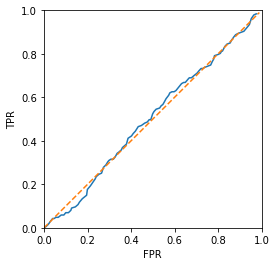

In [13]:
import debug_roc_curve
plt.clf()
test_df = debug_roc_curve.form_random_sample(processed_df)
pts_test = process_rejects.get_roc_curve(test_df, 0.01)
pts_test = np.array(pts_test)
x = pts_test[:,0]
y = pts_test[:,1]
plt.gca().set_aspect("equal")
plt.xlim([0,1])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.ylim([0,1])
plt.plot(x, y)
plt.plot(mid[:,0], mid[:,1], linestyle='dashed')